# TASK #1: PROJECT OVERVIEW 


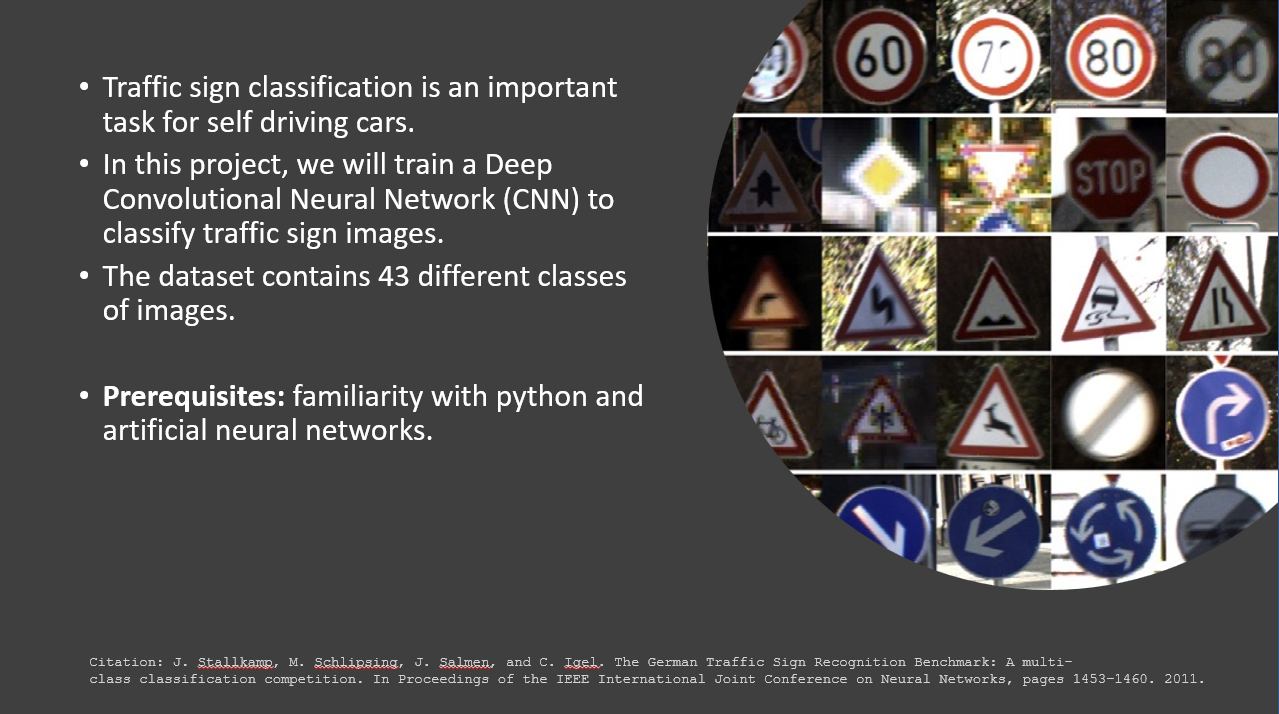

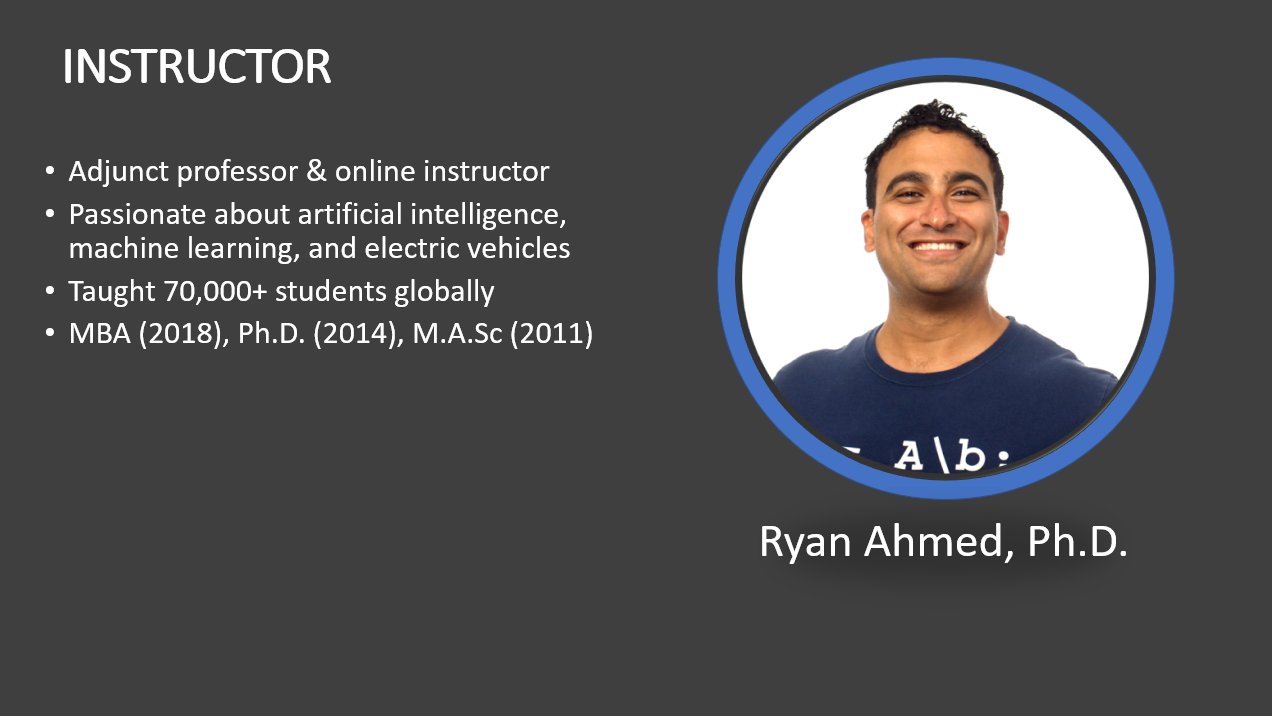

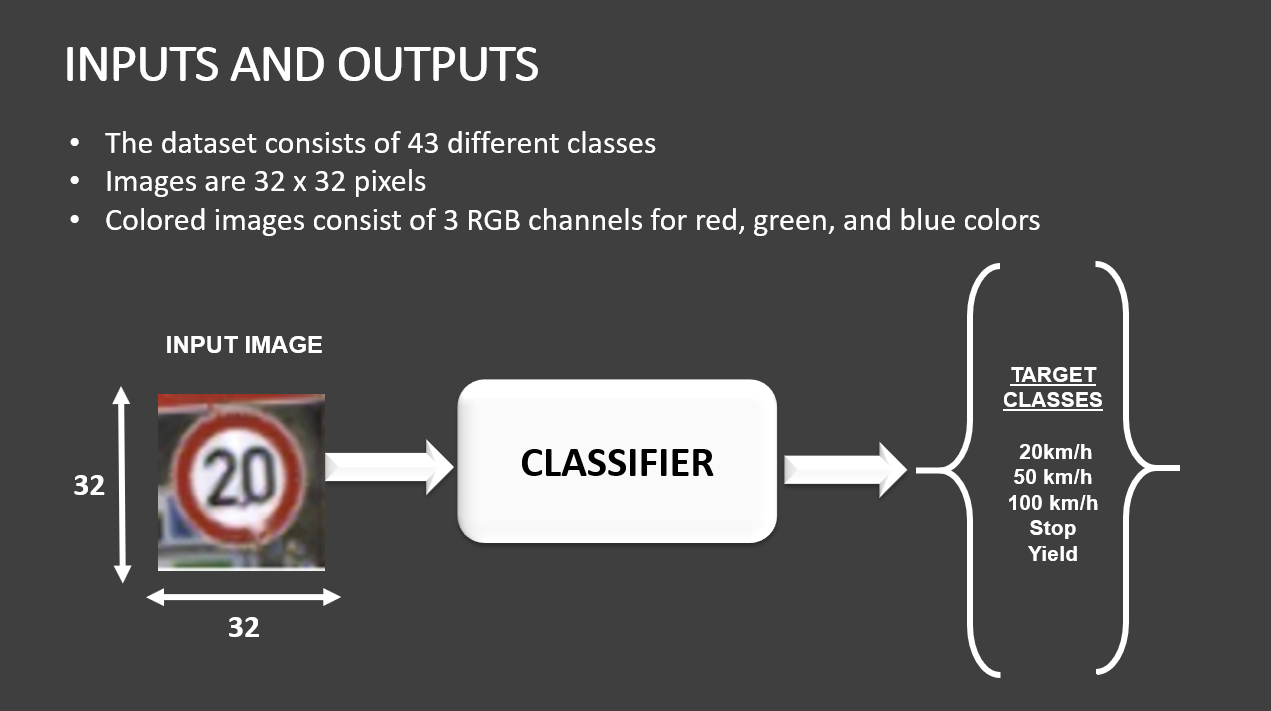

# TASK #2: IMPORT LIBRARIES/DATASETS

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

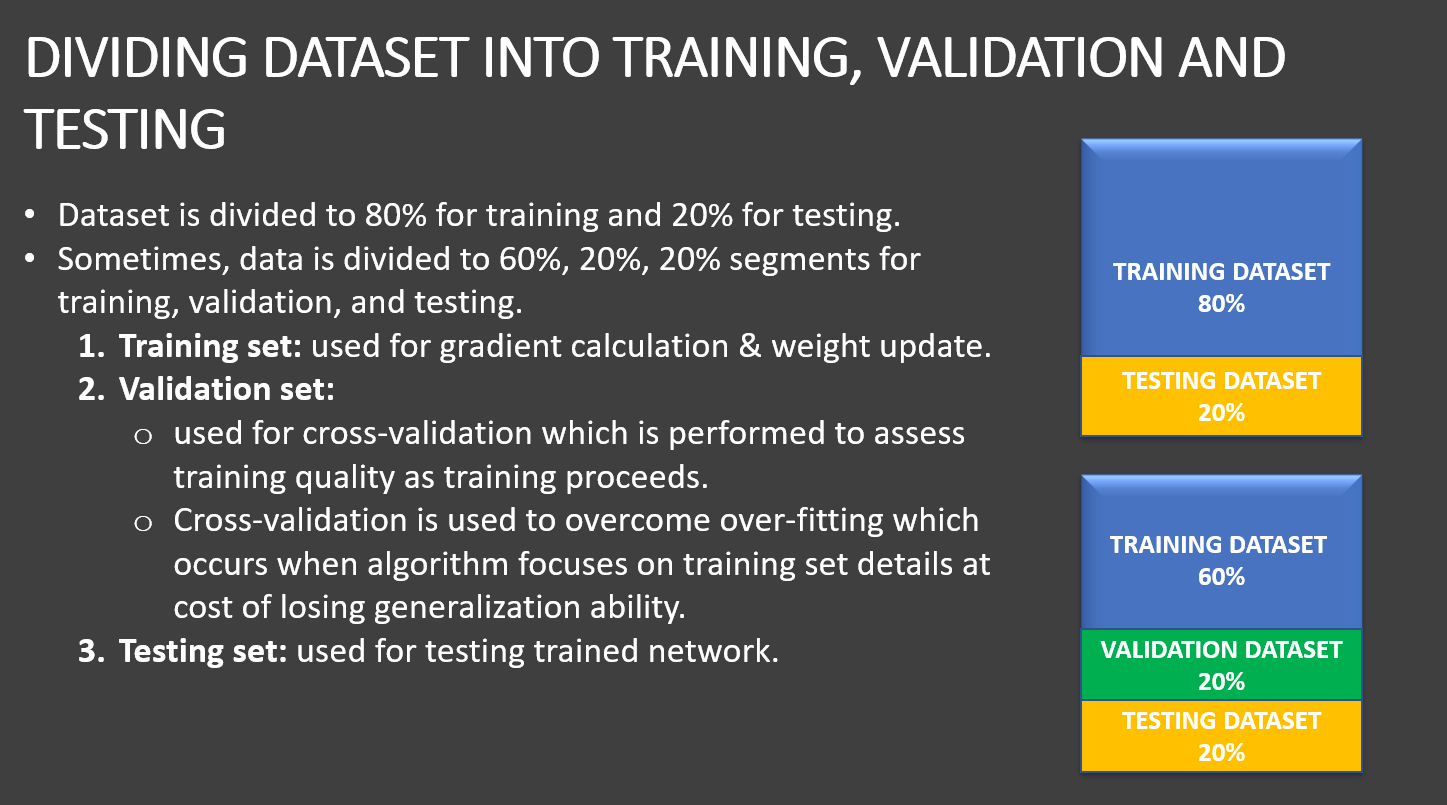

In [18]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [34]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation, = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [20]:
x_train.shape

(34799, 32, 32, 3)

In [21]:
y_train.shape

(34799,)

# TASK #3: PERFORM IMAGES VISUALIZATION

2

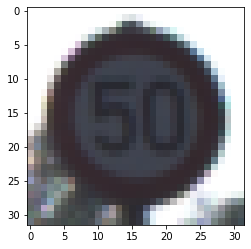

In [22]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

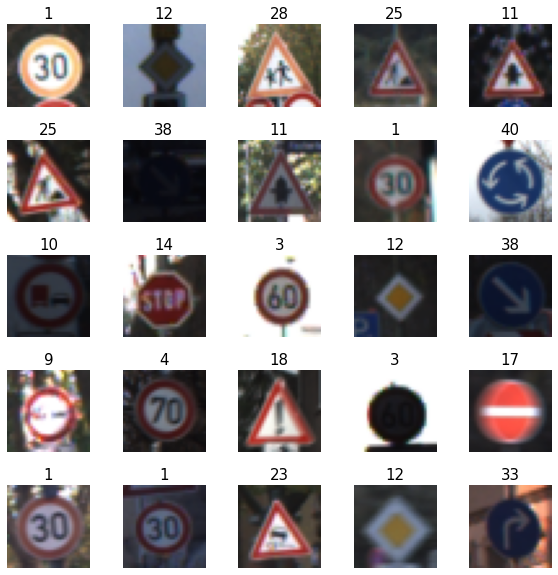

In [23]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes =plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid ) :
    # Select a random number
    index = np.random.randint(0 , n_training)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)
    

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [24]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [25]:
x_train_gray = np.sum(x_train/3 , axis = 3 , keepdims = True)

In [26]:
x_train_gray.shape

(34799, 32, 32, 1)

In [27]:
x_train_gray_norm = (x_train_gray - 128)/128

In [28]:
x_train_gray_norm

array([[[[-0.86979167],
         [-0.86458333],
         [-0.85416667],
         ...,
         [-0.88020833],
         [-0.8828125 ],
         [-0.86979167]],

        [[-0.87239583],
         [-0.86458333],
         [-0.85677083],
         ...,
         [-0.88541667],
         [-0.8828125 ],
         [-0.87239583]],

        [[-0.87239583],
         [-0.8671875 ],
         [-0.86197917],
         ...,
         [-0.88541667],
         [-0.87760417],
         [-0.88020833]],

        ...,

        [[-0.88802083],
         [-0.89583333],
         [-0.90104167],
         ...,
         [-0.90364583],
         [-0.90104167],
         [-0.8984375 ]],

        [[-0.89322917],
         [-0.89322917],
         [-0.90104167],
         ...,
         [-0.90364583],
         [-0.8984375 ],
         [-0.90104167]],

        [[-0.89322917],
         [-0.89583333],
         [-0.90104167],
         ...,
         [-0.8984375 ],
         [-0.890625  ],
         [-0.89583333]]],


       [[[-0.390625  ],


In [29]:

x_test_gray = np.sum(x_test/3 , axis = 3 , keepdims = True)
x_validation_gray = np.sum(x_validation/3 , axis = 3 , keepdims = True)
x_test_gray.shape
x_validation_gray.shape
x_test_gray_norm = (x_test_gray -128)/128
x_validation_gray_norm = (x_validation_gray -128)/128
x_validation_gray_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


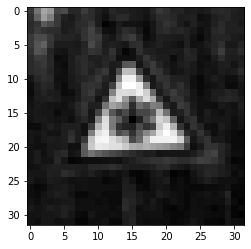

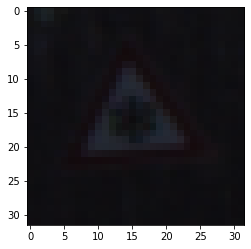

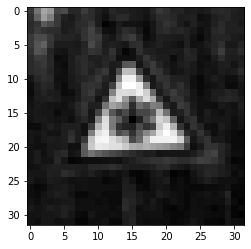

In [30]:

i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

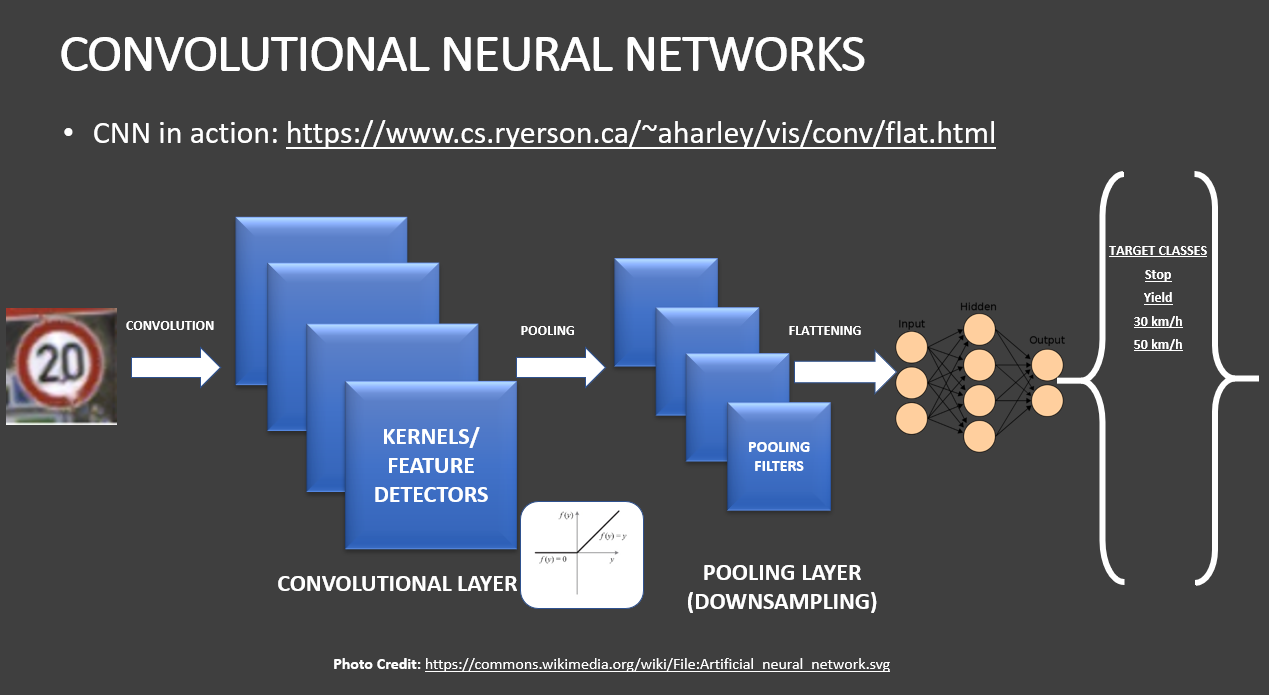

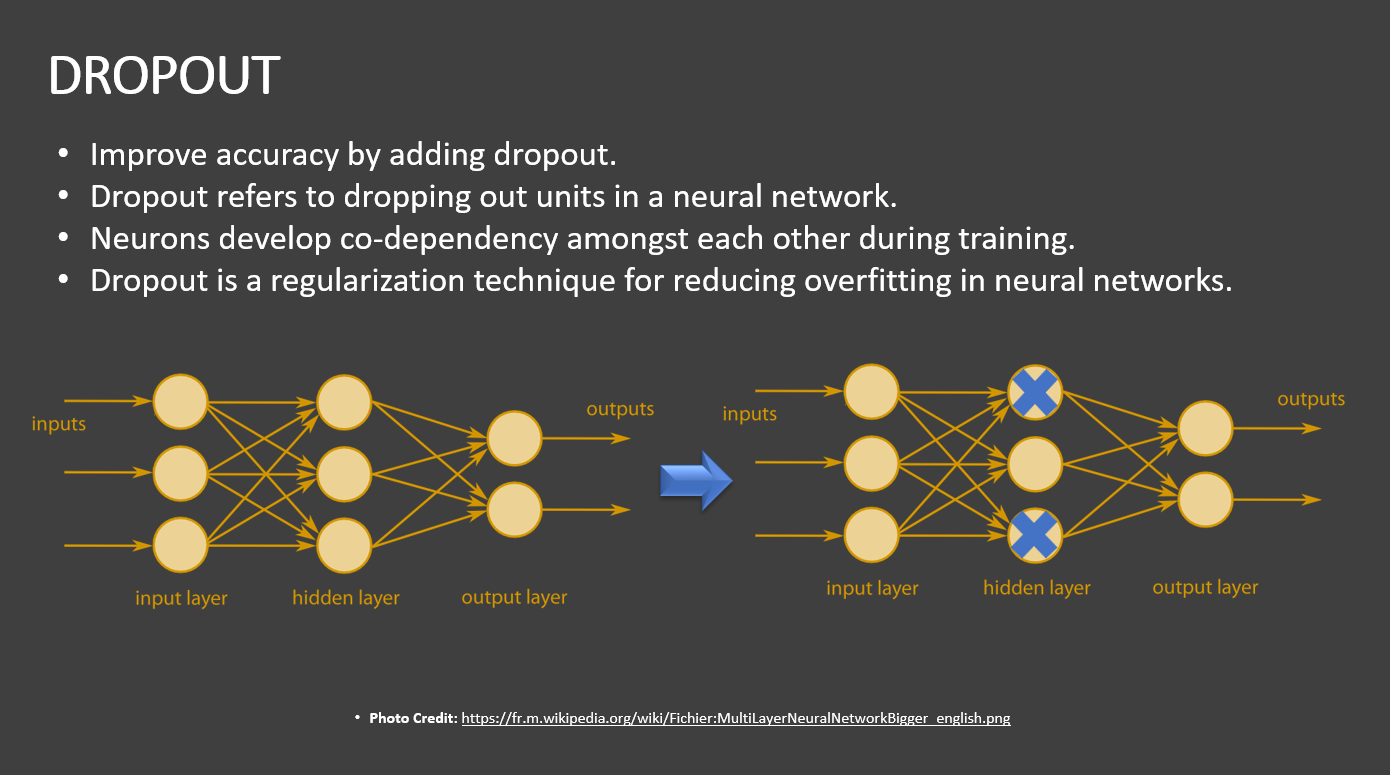

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [42]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape = (32 ,32 ,1)))
CNN.add(layers.AveragePooling2D())


CNN.add(layers.Flatten())

CNN.add(layers.Dense(120 , activation ='relu'))
CNN.add(layers.Dense(84, activation ='relu'))

CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1176)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               141240    
_________________________________________________________________
dense_10 (Dense)             (None, 84)                10164     
_________________________________________________________________
dense_11 (Dense)             (None, 43)                3655      
Total params: 155,215
Trainable params: 155,215
Non-trainable params: 0
________________________________________________

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [43]:
CNN.compile(optimizer = 'Adam' , loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [45]:
history = CNN.fit(x_train_gray_norm,
                  y_train ,
                  batch_size = 500,
                  nb_epoch = 5,
                  verbose = 1,
                  validation_data = (x_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 22s 625us/sample - loss: 3.5304 - accuracy: 0.0532 - val_loss: 3.5531 - val_accuracy: 0.0585
Epoch 2/5
34799/34799 [==============================] - 16s 466us/sample - loss: 3.4831 - accuracy: 0.0570 - val_loss: 3.5607 - val_accuracy: 0.0324
Epoch 3/5
34799/34799 [==============================] - 16s 459us/sample - loss: 3.4790 - accuracy: 0.0593 - val_loss: 3.5631 - val_accuracy: 0.0363
Epoch 4/5
34799/34799 [==============================] - 16s 456us/sample - loss: 3.4759 - accuracy: 0.0614 - val_loss: 3.5680 - val_accuracy: 0.0385
Epoch 5/5
34799/34799 [==============================] - 16s 461us/sample - loss: 3.4728 - accuracy: 0.0604 - val_loss: 3.5660 - val_accuracy: 0.0333


# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

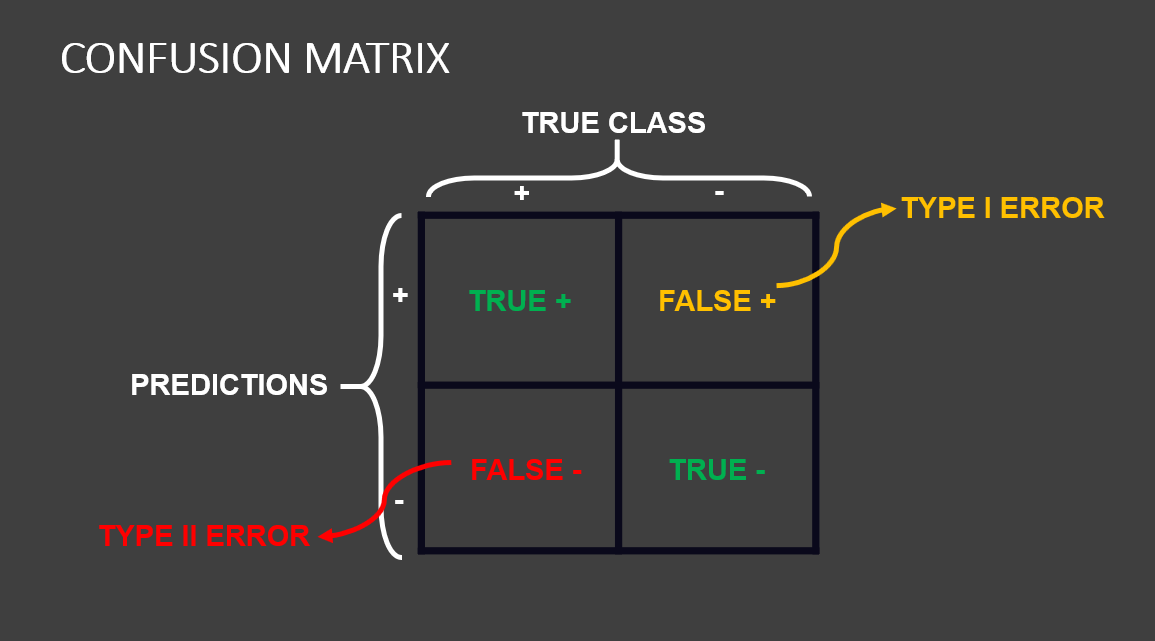

In [46]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 365us/sample - loss: 3.4742 - accuracy: 0.0426
Test Accuracy: 0.04259699210524559


In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

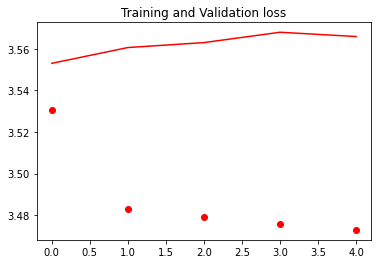

In [49]:
epochs= range(len(accuracy))
plt.plot(epochs , loss, 'ro',label = 'Training loss')
plt.plot(epochs , val_loss ,'r', label = 'Validation loss')
plt.title('Training and Validation loss')

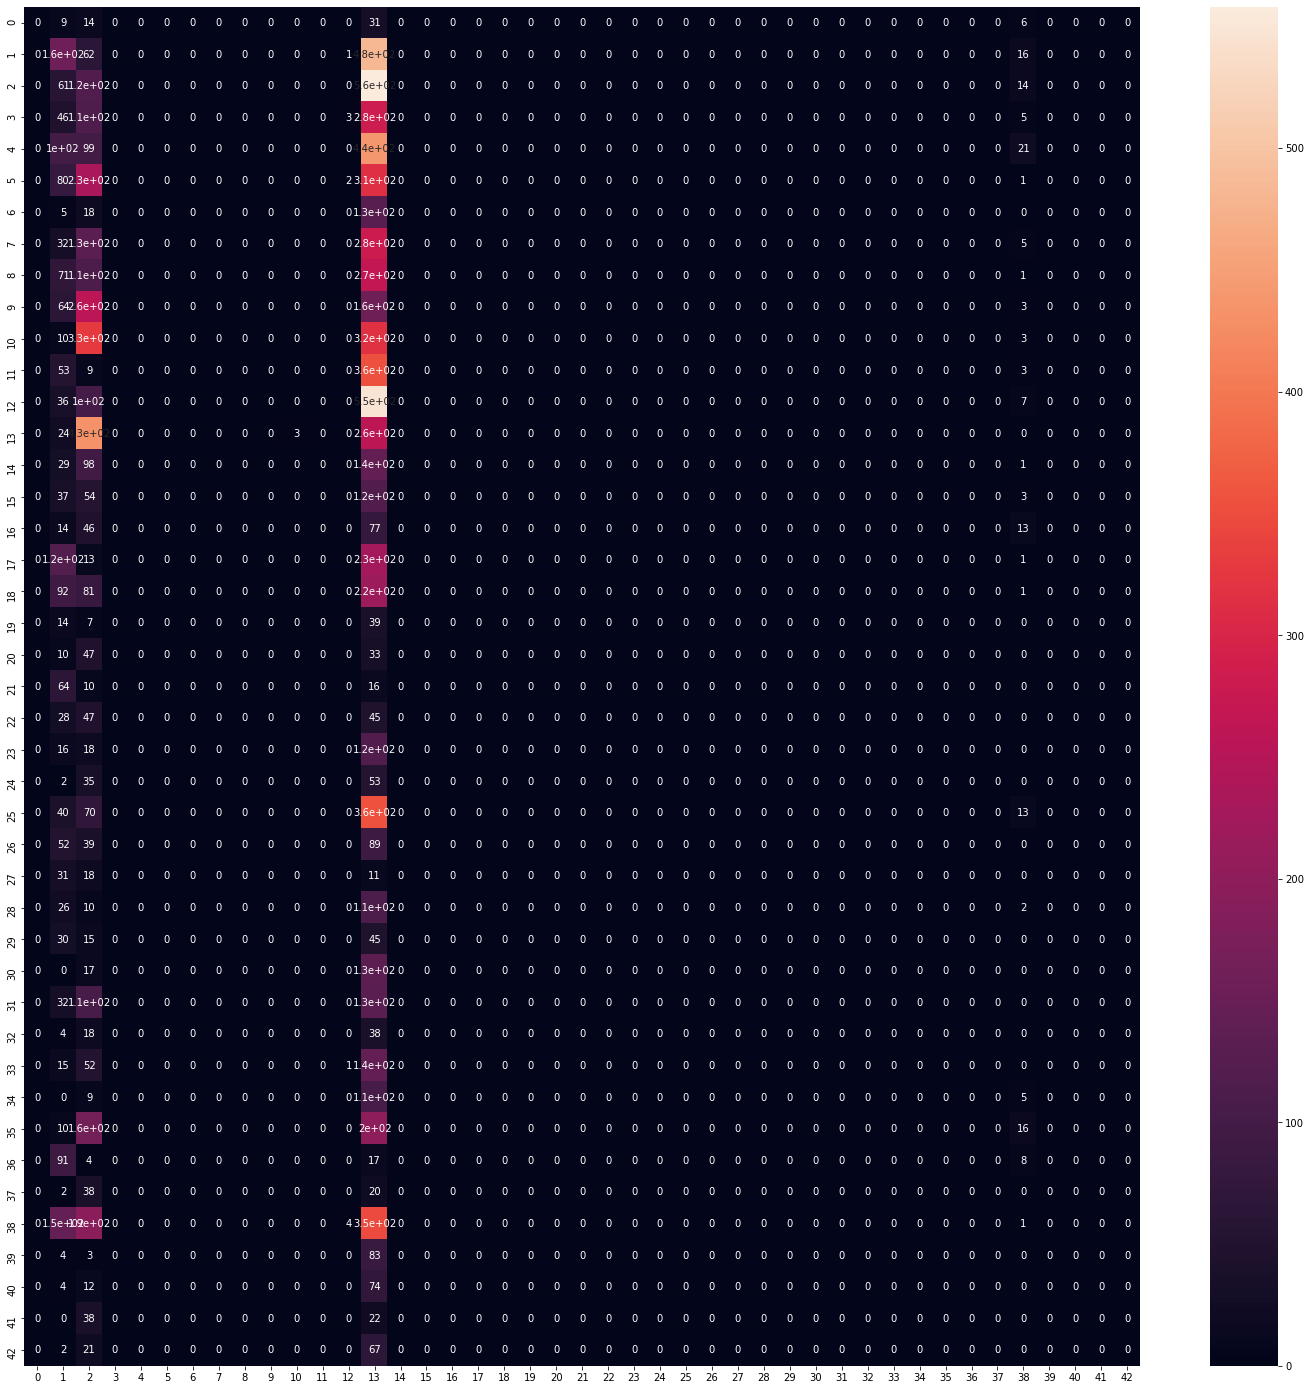

In [50]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

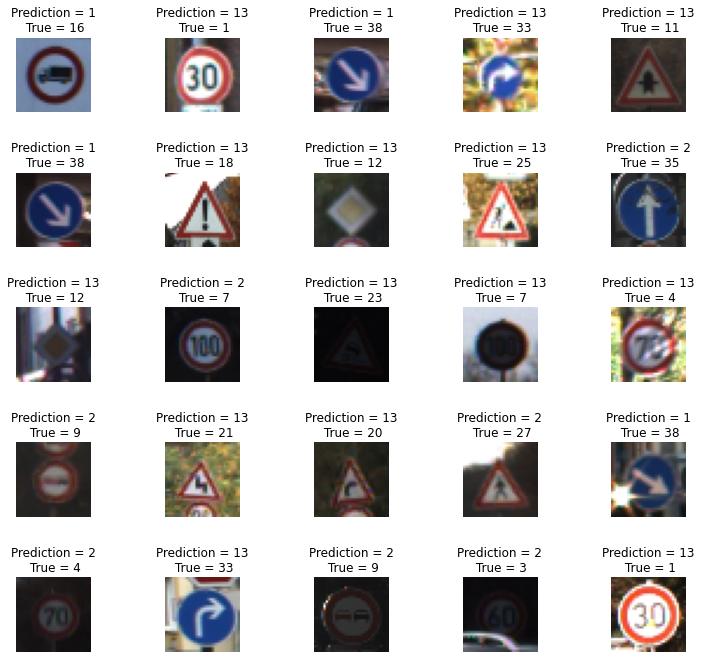

In [51]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# CONGRATULATIONS ON FINISHING THE PROJECT!

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }